In [1]:
#import libraries and modules
import mne
import numpy as np
import scipy
from scipy import stats
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
# sub/med_state00/task/stim/run
raw = mne.io.read_raw(r'/Users/alidzaye/Library/CloudStorage/OneDrive-SharedLibraries-Charité-UniversitätsmedizinBerlin/Interventional Cognitive Neuromodulation - Data/BIDS_Berlin_ECOG_LFP/rawdata/sub-003/ses-EcogLfpMedOff01/ieeg/sub-003_ses-EcogLfpMedOff01_task-Rest_acq-StimOff_run-1_ieeg.vhdr')
raw_on = mne.io.read_raw(r'/Users/alidzaye/Library/CloudStorage/OneDrive-SharedLibraries-Charité-UniversitätsmedizinBerlin/Interventional Cognitive Neuromodulation - Data/BIDS_Berlin_ECOG_LFP/rawdata/sub-003/ses-EcogLfpMedOn01/ieeg/sub-003_ses-EcogLfpMedOn01_task-Rest_acq-StimOff_run-1_ieeg.vhdr')

Extracting parameters from /Users/alidzaye/Library/CloudStorage/OneDrive-SharedLibraries-Charité-UniversitätsmedizinBerlin/Interventional Cognitive Neuromodulation - Data/BIDS_Berlin_ECOG_LFP/rawdata/sub-003/ses-EcogLfpMedOff01/ieeg/sub-003_ses-EcogLfpMedOff01_task-Rest_acq-StimOff_run-1_ieeg.vhdr...
Setting channel info structure...
Extracting parameters from /Users/alidzaye/Library/CloudStorage/OneDrive-SharedLibraries-Charité-UniversitätsmedizinBerlin/Interventional Cognitive Neuromodulation - Data/BIDS_Berlin_ECOG_LFP/rawdata/sub-003/ses-EcogLfpMedOn01/ieeg/sub-003_ses-EcogLfpMedOn01_task-Rest_acq-StimOff_run-1_ieeg.vhdr...
Setting channel info structure...


In [3]:
# pick ecog channels
raw_ecog = raw.copy().pick_channels(raw.ch_names[10:16])
raw_ecog_on = raw_on.copy().pick_channels(raw_on.ch_names[8:14])

In [4]:
# use bipolar reference
anode = raw_ecog.ch_names[0:5]
cathode = raw_ecog.ch_names[1:6]
new_ch_names = ['ECOG_L_1_SMC_BI',
               'ECOG_L_2_SMC_BI',
               'ECOG_L_3_SMC_BI',
               'ECOG_L_4_SMC_BI',
              'ECOG_L_5_SMC_BI']

raw_ecog_bi = mne.set_bipolar_reference(raw_ecog.load_data(), anode=anode,
                                        cathode=cathode, ch_name=new_ch_names )

Reading 0 ... 2536497  =      0.000 ...   619.262 secs...
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=5, n_times=2536498
    Range : 0 ... 2536497 =      0.000 ...   619.262 secs
Ready.
Added the following bipolar channels:
ECOG_L_1_SMC_BI, ECOG_L_2_SMC_BI, ECOG_L_3_SMC_BI, ECOG_L_4_SMC_BI, ECOG_L_5_SMC_BI


In [5]:
# use bipolar reference ON
anode_on = raw_ecog_on.ch_names[0:5]
cathode_on = raw_ecog_on.ch_names[1:6]
new_ch_names = ['ECOG_L_1_SMC_BI',
               'ECOG_L_2_SMC_BI',
               'ECOG_L_3_SMC_BI',
               'ECOG_L_4_SMC_BI',
              'ECOG_L_5_SMC_BI']

raw_ecog_bi_on = mne.set_bipolar_reference(raw_ecog_on.load_data(), anode=anode_on,
                                        cathode=cathode_on, ch_name=new_ch_names )

Reading 0 ... 1729553  =      0.000 ...   422.254 secs...
EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=5, n_times=1729554
    Range : 0 ... 1729553 =      0.000 ...   422.254 secs
Ready.
Added the following bipolar channels:
ECOG_L_1_SMC_BI, ECOG_L_2_SMC_BI, ECOG_L_3_SMC_BI, ECOG_L_4_SMC_BI, ECOG_L_5_SMC_BI


In [6]:
# high pass filtering above 3 Hz
raw_ecog_bi_hi = raw_ecog_bi.copy().filter(3, None,)
raw_ecog_bi_hi_on = raw_ecog_bi_on.copy().filter(3, None,)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 3 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 3.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 2.00 Hz)
- Filter length: 6759 samples (1.650 sec)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 3 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 3.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 2.00 Hz)
- Filter length: 6759 samples (1.650 sec)



In [7]:
# low pass filtering below 250 Hz
raw_ecog_bi_hi_lo = raw_ecog_bi_hi.copy().filter(None, 250)
raw_ecog_bi_hi_lo_on = raw_ecog_bi_hi_on.copy().filter(None, 250)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 2.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 250.00 Hz
- Upper transition bandwidth: 62.50 Hz (-6 dB cutoff frequency: 281.25 Hz)
- Filter length: 217 samples (0.053 sec)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 2.5e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 250.00 Hz
- Upper transition bandwidth: 62.50 Hz (-6 dB cutoff frequency: 281.25 Hz)
- Filter length: 217 samples (0.053 sec)



In [8]:
# bandstop/notch filter 50 Hz
raw_ecog_bi_hi_lo_nf = raw_ecog_bi_hi_lo.copy().notch_filter(np.arange(50,251,50), filter_length="auto", phase='zero')
raw_ecog_bi_hi_lo_nf_on = raw_ecog_bi_hi_lo_on.copy().notch_filter(np.arange(50,251,50), filter_length="auto", phase='zero')

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 27035 samples (6.600 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 27035 samples (6.600 sec)



In [9]:
#Cropping the last bit of data to ignore artefacts at the end
#raw_ecog_cropped_bi = raw_ecog_bi_hi_lo_nf.copy().crop(tmax=618)
#raw_ecog_cropped_bi_on = raw_ecog_bi_hi_lo_nf_on.copy().crop(tmax=420)

In [10]:
#Downsample Data to 250Hz for faster processing
raw_ecog_cropped_dow_bi = raw_ecog_bi_hi_lo_nf.copy().resample(250)
raw_ecog_cropped_dow_bi_on = raw_ecog_bi_hi_lo_nf_on.copy().resample(250)

In [11]:
# get the signal and time array of the data with numpy
signals_array_bi, time_array_bi = raw_ecog_cropped_dow_bi[:, :]
signals_array_on, time_array_on = raw_ecog_cropped_dow_bi_on[:, :]

In [12]:
# get the data with the function
signal_bi = raw_ecog_cropped_dow_bi.copy().get_data()
signal_bi_on = raw_ecog_cropped_dow_bi_on.copy().get_data()

In [13]:
#z-score the data
stand_raw_ecog_cropped_bi = stats.zscore(signal_bi, axis=1)
stand_raw_ecog_cropped_bi_on = stats.zscore(signal_bi_on, axis=1)

In [14]:
#Time Frequency estimation 
freqs = np.arange(1,100)
power = mne.decoding.TimeFrequency(freqs, sfreq=250, method='morlet', n_cycles=10, output='power', )
run_TF_bi = power.transform(stand_raw_ecog_cropped_bi)

In [15]:
#Time Frequency estimation ON
freqs_on = np.arange(1,100)
power_bi_on = mne.decoding.TimeFrequency(freqs, sfreq=250, method='morlet', n_cycles=10, output='power', )
run_TF_bi_on = power_bi_on.transform(stand_raw_ecog_cropped_bi_on)

## Beta bands of the ecog channels
### low beta(13-20Hz), high beta (20-35Hz), full beta (13-35Hz)

In [16]:
low_beta_1_bi = run_TF_bi[0, 12:20,:]
high_beta_1_bi = run_TF_bi[0, 19:35,:]
full_beta_1_bi = run_TF_bi[0, 12:35,:]

In [17]:
low_beta_2_bi = run_TF_bi[1, 12:20,:]
high_beta_2_bi = run_TF_bi[1, 19:35,:]
full_beta_2_bi = run_TF_bi[1, 12:35,:]

In [18]:
low_beta_3_bi = run_TF_bi[2, 12:20,:]
high_beta_3_bi = run_TF_bi[2, 19:35,:]
full_beta_3_bi = run_TF_bi[2, 12:35,:]

In [19]:
low_beta_4_bi = run_TF_bi[3, 12:20,:]
high_beta_4_bi = run_TF_bi[3, 19:35,:]
full_beta_4_bi = run_TF_bi[3, 12:35,:]

In [20]:
low_beta_5_bi = run_TF_bi[4, 12:20,:]
high_beta_5_bi = run_TF_bi[4, 19:35,:]
full_beta_5_bi = run_TF_bi[4, 12:35,:]

In [21]:
low_beta_1_bi_on = run_TF_bi_on[0, 12:20,:]
high_beta_1_bi_on = run_TF_bi_on[0, 19:35,:]
full_beta_1_bi_on = run_TF_bi_on[0, 12:35,:]

low_beta_2_bi_on = run_TF_bi_on[1, 12:20,:]
high_beta_2_bi_on = run_TF_bi_on[1, 19:35,:]
full_beta_2_bi_on = run_TF_bi_on[1, 12:35,:]

low_beta_3_bi_on = run_TF_bi_on[2, 12:20,:]
high_beta_3_bi_on = run_TF_bi_on[2, 19:35,:]
full_beta_3_bi_on = run_TF_bi_on[2, 12:35,:]

low_beta_4_bi_on = run_TF_bi_on[3, 12:20,:]
high_beta_4_bi_on = run_TF_bi_on[3, 19:35,:]
full_beta_4_bi_on = run_TF_bi_on[3, 12:35,:]

low_beta_5_bi_on = run_TF_bi_on[4, 12:20,:]
high_beta_5_bi_on = run_TF_bi_on[4, 19:35,:]
full_beta_5_bi_on = run_TF_bi_on[4, 12:35,:]

## Averaging power in all beta bands in all ecog channel

In [22]:
low_beta_1_averp_bi = np.mean(low_beta_1_bi, axis=0)
high_beta_1_averp_bi = np.mean(high_beta_1_bi, axis=0)
full_beta_1_averp_bi = np.mean(full_beta_1_bi, axis=0)

In [23]:
low_beta_2_averp_bi = np.mean(low_beta_2_bi, axis=0)
high_beta_2_averp_bi = np.mean(high_beta_2_bi, axis=0)
full_beta_2_averp_bi = np.mean(full_beta_2_bi, axis=0)

In [24]:
low_beta_3_averp_bi = np.mean(low_beta_3_bi, axis=0)
high_beta_3_averp_bi = np.mean(high_beta_3_bi, axis=0)
full_beta_3_averp_bi = np.mean(full_beta_3_bi, axis=0)

In [25]:
low_beta_4_averp_bi = np.mean(low_beta_4_bi, axis=0)
high_beta_4_averp_bi = np.mean(high_beta_4_bi, axis=0)
full_beta_4_averp_bi = np.mean(full_beta_4_bi, axis=0)

In [26]:
low_beta_5_averp_bi = np.mean(low_beta_5_bi, axis=0)
high_beta_5_averp_bi = np.mean(high_beta_5_bi, axis=0)
full_beta_5_averp_bi = np.mean(full_beta_5_bi, axis=0)

In [27]:
low_beta_1_averp_bi_on = np.mean(low_beta_1_bi_on, axis=0)
high_beta_1_averp_bi_on = np.mean(high_beta_1_bi_on, axis=0)
full_beta_1_averp_bi_on = np.mean(full_beta_1_bi_on, axis=0)

low_beta_2_averp_bi_on = np.mean(low_beta_2_bi_on, axis=0)
high_beta_2_averp_bi_on = np.mean(high_beta_2_bi_on, axis=0)
full_beta_2_averp_bi_on = np.mean(full_beta_2_bi_on, axis=0)

low_beta_3_averp_bi_on = np.mean(low_beta_3_bi_on, axis=0)
high_beta_3_averp_bi_on = np.mean(high_beta_3_bi_on, axis=0)
full_beta_3_averp_bi_on = np.mean(full_beta_3_bi_on, axis=0)

low_beta_4_averp_bi_on = np.mean(low_beta_4_bi_on, axis=0)
high_beta_4_averp_bi_on = np.mean(high_beta_4_bi_on, axis=0)
full_beta_4_averp_bi_on = np.mean(full_beta_4_bi_on, axis=0)

low_beta_5_averp_bi_on = np.mean(low_beta_5_bi_on, axis=0)
high_beta_5_averp_bi_on = np.mean(high_beta_5_bi_on, axis=0)
full_beta_5_averp_bi_on = np.mean(full_beta_5_bi_on, axis=0)

## Z-Scored averaged beta traces

In [28]:
low_beta_1_averp_norm_bi = stats.zscore(low_beta_1_averp_bi, axis=0)
high_beta_1_averp_norm_bi = stats.zscore(high_beta_1_averp_bi, axis=0)
full_beta_1_averp_norm_bi = stats.zscore(high_beta_1_averp_bi, axis=0)

low_beta_2_averp_norm_bi = stats.zscore(low_beta_2_averp_bi, axis=0)
high_beta_2_averp_norm_bi = stats.zscore(high_beta_2_averp_bi, axis=0)
full_beta_2_averp_norm_bi = stats.zscore(high_beta_2_averp_bi, axis=0)

low_beta_3_averp_norm_bi = stats.zscore(low_beta_3_averp_bi, axis=0)
high_beta_3_averp_norm_bi = stats.zscore(high_beta_3_averp_bi, axis=0)
full_beta_3_averp_norm_bi = stats.zscore(high_beta_3_averp_bi, axis=0)

low_beta_4_averp_norm_bi = stats.zscore(low_beta_4_averp_bi, axis=0)
high_beta_4_averp_norm_bi = stats.zscore(high_beta_4_averp_bi, axis=0)
full_beta_4_averp_norm_bi = stats.zscore(high_beta_4_averp_bi, axis=0)

low_beta_5_averp_norm_bi = stats.zscore(low_beta_5_averp_bi, axis=0)
high_beta_5_averp_norm_bi = stats.zscore(high_beta_5_averp_bi, axis=0)
full_beta_5_averp_norm_bi = stats.zscore(high_beta_5_averp_bi, axis=0)

In [29]:
low_beta_1_averp_norm_bi_on = stats.zscore(low_beta_1_averp_bi_on, axis=0)
high_beta_1_averp_norm_bi_on = stats.zscore(high_beta_1_averp_bi_on, axis=0)
full_beta_1_averp_norm_bi_on = stats.zscore(high_beta_1_averp_bi_on, axis=0)

low_beta_2_averp_norm_bi_on = stats.zscore(low_beta_2_averp_bi_on, axis=0)
high_beta_2_averp_norm_bi_on = stats.zscore(high_beta_2_averp_bi_on, axis=0)
full_beta_2_averp_norm_bi_on = stats.zscore(high_beta_2_averp_bi_on, axis=0)

low_beta_3_averp_norm_bi_on = stats.zscore(low_beta_3_averp_bi_on, axis=0)
high_beta_3_averp_norm_bi_on = stats.zscore(high_beta_3_averp_bi_on, axis=0)
full_beta_3_averp_norm_bi_on = stats.zscore(high_beta_3_averp_bi_on, axis=0)

low_beta_4_averp_norm_bi_on = stats.zscore(low_beta_4_averp_bi_on, axis=0)
high_beta_4_averp_norm_bi_on = stats.zscore(high_beta_4_averp_bi_on, axis=0)
full_beta_4_averp_norm_bi_on = stats.zscore(high_beta_4_averp_bi_on, axis=0)

low_beta_5_averp_norm_bi_on = stats.zscore(low_beta_5_averp_bi_on, axis=0)
high_beta_5_averp_norm_bi_on = stats.zscore(high_beta_5_averp_bi_on, axis=0)
full_beta_5_averp_norm_bi_on = stats.zscore(high_beta_5_averp_bi_on, axis=0)

## Threshold

In [30]:
full_beta_1_thr_raw = np.percentile(full_beta_1_averp_norm_bi, 75)
full_beta_2_thr_raw = np.percentile(full_beta_2_averp_norm_bi, 75)
full_beta_3_thr_raw = np.percentile(full_beta_3_averp_norm_bi, 75)
full_beta_4_thr_raw = np.percentile(full_beta_4_averp_norm_bi, 75)
full_beta_5_thr_raw = np.percentile(full_beta_5_averp_norm_bi, 75)


In [31]:
low_beta_1_thr_bi_on = np.percentile(low_beta_1_averp_norm_bi_on, 75)
high_beta_1_thr_bi_on = np.percentile(high_beta_1_averp_norm_bi_on, 75)
full_beta_1_thr_bi_on = np.percentile(full_beta_1_averp_norm_bi_on, 75)

low_beta_2_thr_bi_on = np.percentile(low_beta_2_averp_norm_bi_on, 75)
high_beta_2_thr_bi_on = np.percentile(high_beta_2_averp_norm_bi_on, 75)
full_beta_2_thr_bi_on = np.percentile(full_beta_2_averp_norm_bi_on, 75)

low_beta_3_thr_bi_on = np.percentile(low_beta_3_averp_norm_bi_on, 75)
high_beta_3_thr_bi_on = np.percentile(high_beta_3_averp_norm_bi_on, 75)
full_beta_3_thr_bi_on = np.percentile(full_beta_3_averp_norm_bi_on, 75)

low_beta_4_thr_bi_on = np.percentile(low_beta_4_averp_norm_bi_on, 75)
high_beta_4_thr_bi_on = np.percentile(high_beta_4_averp_norm_bi_on, 75)
full_beta_4_thr_bi_on = np.percentile(full_beta_4_averp_norm_bi_on, 75)

low_beta_5_thr_bi_on = np.percentile(low_beta_5_averp_norm_bi_on, 75)
high_beta_5_thr_bi_on = np.percentile(high_beta_5_averp_norm_bi_on, 75)
full_beta_5_thr_bi_on = np.percentile(full_beta_5_averp_norm_bi_on, 75)

## Analysing the duration of beta burst 


In [32]:
def get_burst_length(beta_averp_norm,beta_thr, sfreq=250):
    """
    Parameter
    low_
    """
    deriv = np.diff (beta_averp_norm >= beta_thr) 
    isburst = False
    burst_length = []
    burst_start = 0

    for index, i in enumerate(deriv):
    
        #print (index)
        #print(i)
        if i == True:
            #print("TRUE")
            if isburst == True:
                burst_length.append(index - burst_start)

                isburst = False
            else:
                burst_start = index
                isburst = True
    burst_length = np.array(burst_length)/sfreq
    
    return burst_length
      

## burst_length of full beta in all ECOG channels OFF

In [33]:


burst_length_cl_1 = get_burst_length(full_beta_1_averp_norm_bi,full_beta_1_thr_raw, sfreq = 250)
burst_length_cl_2 = get_burst_length(full_beta_2_averp_norm_bi,full_beta_2_thr_raw, sfreq = 250)
burst_length_cl_3 = get_burst_length(full_beta_3_averp_norm_bi,full_beta_3_thr_raw, sfreq = 250)
burst_length_cl_4 = get_burst_length(full_beta_4_averp_norm_bi,full_beta_4_thr_raw, sfreq = 250)
burst_length_cl_5 = get_burst_length(full_beta_5_averp_norm_bi,full_beta_5_thr_raw, sfreq = 250)


In [34]:
burst_length_bi_1 = [ i for i in burst_length_cl_1 if i >= 0.1]
burst_length_bi_2 = [ i for i in burst_length_cl_2 if i >= 0.1]
burst_length_bi_3 = [ i for i in burst_length_cl_3 if i >= 0.1]
burst_length_bi_4 = [ i for i in burst_length_cl_4 if i >= 0.1]
burst_length_bi_5 = [ i for i in burst_length_cl_5 if i >= 0.1]

In [35]:
mean_burst_lenght_4 = np.nanmean(burst_length_bi_4, axis=0)

In [36]:
mean_burst_lenght_4

0.5450870083432658

## burst_length of full beta in all ECOG channels ON

In [37]:
burst_length_1_cl_on = get_burst_length(full_beta_1_averp_norm_bi_on,full_beta_1_thr_bi_on, sfreq = 250)
burst_length_2_cl_on = get_burst_length(full_beta_2_averp_norm_bi_on,full_beta_2_thr_bi_on, sfreq = 250)
burst_length_3_cl_on = get_burst_length(full_beta_3_averp_norm_bi_on,full_beta_3_thr_bi_on, sfreq = 250)
burst_length_4_cl_on = get_burst_length(full_beta_4_averp_norm_bi_on,full_beta_4_thr_bi_on, sfreq = 250)
burst_length_5_cl_on = get_burst_length(full_beta_5_averp_norm_bi_on,full_beta_5_thr_bi_on, sfreq = 250)

In [38]:
burst_length_1_bi_on = [ i for i in burst_length_1_cl_on if i >= 0.1]
burst_length_2_bi_on = [ i for i in burst_length_1_cl_on if i >= 0.1]
burst_length_3_bi_on = [ i for i in burst_length_1_cl_on if i >= 0.1]
burst_length_4_bi_on = [ i for i in burst_length_1_cl_on if i >= 0.1]
burst_length_5_bi_on = [ i for i in burst_length_1_cl_on if i >= 0.1]

In [39]:
mean_burst_lenght_4_on = np.nanmean(burst_length_4_bi_on, axis=0)

## Histogram 

In [40]:
hist_dur_1, bins3 = np.histogram(burst_length_bi_1,density=False, bins=20, range=(0, 2))
hist_dur_2, bins3 = np.histogram(burst_length_bi_2,density=False, bins=20, range=(0, 2))
hist_dur_3, bins3 = np.histogram(burst_length_bi_3,density=False, bins=20, range=(0, 2))
hist_dur_4, bins3 = np.histogram(burst_length_bi_4,density=False, bins=20, range=(0, 2))
hist_dur_5, bins3 = np.histogram(burst_length_bi_5,density=False, bins=20, range=(0, 2))

hist_dur_1_on, bins3 = np.histogram(burst_length_1_bi_on,density=False, bins=20, range=(0, 2))
hist_dur_2_on, bins3 = np.histogram(burst_length_2_bi_on,density=False, bins=20, range=(0, 2))
hist_dur_3_on, bins3 = np.histogram(burst_length_3_bi_on,density=False, bins=20, range=(0, 2))
hist_dur_4_on, bins3 = np.histogram(burst_length_4_bi_on,density=False, bins=20, range=(0, 2))
hist_dur_5_on, bins3 = np.histogram(burst_length_5_bi_on,density=False, bins=20, range=(0, 2))

## Normed Histogram

In [41]:
normed_hist_1 = 100*hist_dur_1 / len(burst_length_bi_1)
normed_hist_2 = 100*hist_dur_2/ len(burst_length_bi_2)
normed_hist_3= 100*hist_dur_3 / len(burst_length_bi_3)
normed_hist_4 = 100*hist_dur_4 / len(burst_length_bi_4)
normed_hist_5 = 100*hist_dur_5 / len(burst_length_bi_5)

normed_hist_1_on = 100*hist_dur_1_on/ len(burst_length_1_bi_on)
normed_hist_2_on = 100*hist_dur_2_on/ len(burst_length_2_bi_on)
normed_hist_3_on = 100*hist_dur_3_on / len(burst_length_3_bi_on)
normed_hist_4_on = 100*hist_dur_4_on/ len(burst_length_4_bi_on)
normed_hist_5_on = 100*hist_dur_5_on/ len(burst_length_5_bi_on)

## Power Spectral Density

In [42]:
power_spectrum_for_channel_0 = np.nanmean(np.squeeze(run_TF_bi[0,:,:]), axis=1)
power_spectrum_for_channel_1 = np.nanmean(np.squeeze(run_TF_bi[1,:,:]), axis=1)
power_spectrum_for_channel_2 = np.nanmean(np.squeeze(run_TF_bi[2,:,:]), axis=1)
power_spectrum_for_channel_3 = np.nanmean(np.squeeze(run_TF_bi[3,:,:]), axis=1)
power_spectrum_for_channel_4 = np.nanmean(np.squeeze(run_TF_bi[4,:,:]), axis=1)

power_spectrum_for_channel_0_on = np.nanmean(np.squeeze(run_TF_bi_on[0,:,:]), axis=1)
power_spectrum_for_channel_1_on = np.nanmean(np.squeeze(run_TF_bi_on[1,:,:]), axis=1)
power_spectrum_for_channel_2_on = np.nanmean(np.squeeze(run_TF_bi_on[2,:,:]), axis=1)
power_spectrum_for_channel_3_on = np.nanmean(np.squeeze(run_TF_bi_on[3,:,:]), axis=1)
power_spectrum_for_channel_4_on = np.nanmean(np.squeeze(run_TF_bi_on[4,:,:]), axis=1)

In [43]:
npow_0 = power_spectrum_for_channel_0/np.sum(power_spectrum_for_channel_0[4:45] + power_spectrum_for_channel_0[54:95])
npow_1 = power_spectrum_for_channel_1/np.sum(power_spectrum_for_channel_1[4:45] + power_spectrum_for_channel_1[54:95])
npow_2 = power_spectrum_for_channel_2/np.sum(power_spectrum_for_channel_2[4:45] + power_spectrum_for_channel_2[54:95])
npow_3 = power_spectrum_for_channel_3/np.sum(power_spectrum_for_channel_3[4:45] + power_spectrum_for_channel_3[54:95])
npow_4 = power_spectrum_for_channel_4/np.sum(power_spectrum_for_channel_4[4:45] + power_spectrum_for_channel_4[54:95])

npow_0_on = power_spectrum_for_channel_0_on/np.sum(power_spectrum_for_channel_0_on[4:45] + power_spectrum_for_channel_0_on[54:95])
npow_1_on = power_spectrum_for_channel_1_on/np.sum(power_spectrum_for_channel_1_on[4:45] + power_spectrum_for_channel_1_on[54:95])
npow_2_on = power_spectrum_for_channel_2_on/np.sum(power_spectrum_for_channel_2_on[4:45] + power_spectrum_for_channel_2_on[54:95])
npow_3_on = power_spectrum_for_channel_3_on/np.sum(power_spectrum_for_channel_3_on[4:45] + power_spectrum_for_channel_3_on[54:95])
npow_4_on = power_spectrum_for_channel_4_on/np.sum(power_spectrum_for_channel_4_on[4:45] + power_spectrum_for_channel_4_on[54:95])

## Normed Histogram of Duration 1B

In [44]:
prob_lg_bursts_1=normed_hist_1[np.arange(8,20,1)].sum()
prob_lg_bursts_1_on=normed_hist_1_on[np.arange(8,20,1)].sum()

prob_lg_bursts_2=normed_hist_2[np.arange(8,20,1)].sum()
prob_lg_bursts_2_on=normed_hist_2_on[np.arange(8,20,1)].sum()

prob_lg_bursts_3=normed_hist_3[np.arange(8,20,1)].sum()
prob_lg_bursts_3_on=normed_hist_3_on[np.arange(8,20,1)].sum()

prob_lg_bursts_4=normed_hist_4[np.arange(8,20,1)].sum()
prob_lg_bursts_4_on=normed_hist_4_on[np.arange(8,20,1)].sum()

prob_lg_bursts_5=normed_hist_5[np.arange(8,20,1)].sum()
prob_lg_bursts_5_on=normed_hist_5_on[np.arange(8,20,1)].sum()

In [45]:
array_ot_bursts_1 = normed_hist_1[np.arange(0,8)]
array_ot_bursts_1_on = normed_hist_1_on[np.arange(0,8)]
arr_sh_bursts_1 = np.delete(array_ot_bursts_1,0)
arr_sh_bursts_1_on = np.delete(array_ot_bursts_1_on,0)

array_ot_bursts_2 = normed_hist_2[np.arange(0,8)]
array_ot_bursts_2_on = normed_hist_2_on[np.arange(0,8)]
arr_sh_bursts_2 = np.delete(array_ot_bursts_2,0)
arr_sh_bursts_2_on = np.delete(array_ot_bursts_2_on,0)

array_ot_bursts_3 = normed_hist_3[np.arange(0,8)]
array_ot_bursts_3_on = normed_hist_3_on[np.arange(0,8)]
arr_sh_bursts_3 = np.delete(array_ot_bursts_3,0)
arr_sh_bursts_3_on = np.delete(array_ot_bursts_3_on,0)

array_ot_bursts_4 = normed_hist_4[np.arange(0,8)]
array_ot_bursts_4_on = normed_hist_4_on[np.arange(0,8)]
arr_sh_bursts_4 = np.delete(array_ot_bursts_4,0)
arr_sh_bursts_4_on = np.delete(array_ot_bursts_4_on,0)

array_ot_bursts_5 = normed_hist_5[np.arange(0,8)]
array_ot_bursts_5_on = normed_hist_5_on[np.arange(0,8)]
arr_sh_bursts_5 = np.delete(array_ot_bursts_5,0)
arr_sh_bursts_5_on = np.delete(array_ot_bursts_5_on,0)

In [46]:
burst_prob_dur_1 = np.append(arr_sh_bursts_1,prob_lg_bursts_1)
burst_prob_dur_1_on = np.append(arr_sh_bursts_1_on,prob_lg_bursts_1_on)

burst_prob_dur_2 = np.append(arr_sh_bursts_2,prob_lg_bursts_2)
burst_prob_dur_2_on = np.append(arr_sh_bursts_2_on,prob_lg_bursts_2_on)

burst_prob_dur_3 = np.append(arr_sh_bursts_3,prob_lg_bursts_3)
burst_prob_dur_3_on = np.append(arr_sh_bursts_3_on,prob_lg_bursts_3_on)

burst_prob_dur_4 = np.append(arr_sh_bursts_4,prob_lg_bursts_4)
burst_prob_dur_4_on = np.append(arr_sh_bursts_4_on,prob_lg_bursts_4_on)

burst_prob_dur_5 = np.append(arr_sh_bursts_5,prob_lg_bursts_5)
burst_prob_dur_5_on = np.append(arr_sh_bursts_5_on,prob_lg_bursts_5_on)

In [47]:
bins_dur=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,'>0.8'] 

In [48]:
df_probdur_1 = pd.DataFrame(data=[bins_dur,burst_prob_dur_1]) 
df_probdur_1_on = pd.DataFrame(data=[bins_dur,burst_prob_dur_1_on]) 

df_probdur_2 = pd.DataFrame(data=[bins_dur,burst_prob_dur_2]) 
df_probdur_2_on = pd.DataFrame(data=[bins_dur,burst_prob_dur_2_on]) 

df_probdur_3 = pd.DataFrame(data=[bins_dur,burst_prob_dur_3]) 
df_probdur_3_on = pd.DataFrame(data=[bins_dur,burst_prob_dur_3_on]) 

df_probdur_4 = pd.DataFrame(data=[bins_dur,burst_prob_dur_4]) 
df_probdur_4_on = pd.DataFrame(data=[bins_dur,burst_prob_dur_4_on]) 

df_probdur_5 = pd.DataFrame(data=[bins_dur,burst_prob_dur_5]) 
df_probdur_5_on = pd.DataFrame(data=[bins_dur,burst_prob_dur_5_on]) 

In [49]:
df_probdur_t_1 =df_probdur_1.T
df_probdur_t_1_on =df_probdur_1_on.T

df_probdur_t_2 =df_probdur_2.T
df_probdur_t_2_on =df_probdur_2_on.T

df_probdur_t_3 =df_probdur_3.T
df_probdur_t_3_on =df_probdur_3_on.T

df_probdur_t_4 =df_probdur_4.T
df_probdur_t_4_on =df_probdur_4_on.T

df_probdur_t_5 =df_probdur_5.T
df_probdur_t_5_on =df_probdur_5_on.T

In [50]:
df_probdur_t_r_1 = df_probdur_t_1.rename(columns={0: "Burst Duration (s)",1:'Burst Probability (%)'})
df_probdur_t_r_1_on = df_probdur_t_1_on.rename(columns={0: "Burst Duration (s)",1:'Burst Probability (%)'})

df_probdur_t_r_2 = df_probdur_t_2.rename(columns={0: "Burst Duration (s)",1:'Burst Probability (%)'})
df_probdur_t_r_2_on = df_probdur_t_2_on.rename(columns={0: "Burst Duration (s)",1:'Burst Probability (%)'})

df_probdur_t_r_3 = df_probdur_t_3.rename(columns={0: "Burst Duration (s)",1:'Burst Probability (%)'})
df_probdur_t_r_3_on = df_probdur_t_3_on.rename(columns={0: "Burst Duration (s)",1:'Burst Probability (%)'})

df_probdur_t_r_4 = df_probdur_t_4.rename(columns={0: "Burst Duration (s)",1:'Burst Probability (%)'})
df_probdur_t_r_4_on = df_probdur_t_4_on.rename(columns={0: "Burst Duration (s)",1:'Burst Probability (%)'})

df_probdur_t_r_5 = df_probdur_t_5.rename(columns={0: "Burst Duration (s)",1:'Burst Probability (%)'})
df_probdur_t_r_5_on = df_probdur_t_5_on.rename(columns={0: "Burst Duration (s)",1:'Burst Probability (%)'})

In [51]:
df_probdur_t_r_m_1 = df_probdur_t_r_1.assign(Medication = 'OFF')
df_probdur_t_r_m_1_on = df_probdur_t_r_1_on.assign(Medication = 'ON')

df_probdur_t_r_m_2 = df_probdur_t_r_2.assign(Medication = 'OFF')
df_probdur_t_r_m_2_on = df_probdur_t_r_2_on.assign(Medication = 'ON')

df_probdur_t_r_m_3 = df_probdur_t_r_3.assign(Medication = 'OFF')
df_probdur_t_r_m_3_on = df_probdur_t_r_3_on.assign(Medication = 'ON')

df_probdur_t_r_m_4 = df_probdur_t_r_4.assign(Medication = 'OFF')
df_probdur_t_r_m_4_on = df_probdur_t_r_4_on.assign(Medication = 'ON')

df_probdur_t_r_m_5 = df_probdur_t_r_5.assign(Medication = 'OFF')
df_probdur_t_r_m_5_on = df_probdur_t_r_5_on.assign(Medication = 'ON')

In [52]:
cdf_probdur_1 = pd.concat([df_probdur_t_r_m_1, df_probdur_t_r_m_1_on])
cdf_probdur_2 = pd.concat([df_probdur_t_r_m_2, df_probdur_t_r_m_2_on])
cdf_probdur_3 = pd.concat([df_probdur_t_r_m_3, df_probdur_t_r_m_3_on])
cdf_probdur_4 = pd.concat([df_probdur_t_r_m_4, df_probdur_t_r_m_4_on])
cdf_probdur_5 = pd.concat([df_probdur_t_r_m_5, df_probdur_t_r_m_5_on])

## Mean Duration 1C

In [53]:
df4 = pd.DataFrame(burst_length_bi_4)
df4_on = pd.DataFrame(burst_length_4_bi_on) 

In [54]:
burst_length_bi_4

[1.724,
 2.46,
 0.8,
 0.12,
 0.152,
 0.812,
 0.256,
 0.236,
 0.176,
 1.444,
 0.192,
 1.124,
 0.736,
 0.44,
 0.116,
 1.252,
 0.376,
 0.796,
 0.156,
 0.328,
 0.176,
 0.444,
 0.232,
 0.144,
 0.156,
 0.228,
 0.26,
 0.344,
 0.74,
 0.264,
 1.408,
 0.144,
 0.908,
 0.612,
 0.484,
 0.336,
 1.092,
 0.704,
 2.524,
 0.228,
 0.504,
 0.544,
 0.216,
 0.208,
 0.772,
 0.82,
 0.504,
 1.58,
 0.3,
 1.184,
 0.888,
 0.184,
 0.364,
 0.284,
 1.18,
 0.148,
 0.34,
 0.32,
 0.188,
 0.116,
 0.124,
 0.256,
 0.176,
 0.168,
 2.104,
 0.22,
 0.132,
 1.588,
 0.656,
 0.72,
 1.46,
 0.152,
 0.156,
 0.884,
 0.184,
 0.128,
 0.348,
 0.512,
 0.496,
 1.116,
 1.248,
 0.12,
 0.344,
 0.268,
 0.232,
 0.104,
 0.924,
 0.192,
 0.704,
 0.44,
 0.58,
 1.672,
 0.108,
 0.92,
 0.388,
 0.128,
 0.256,
 0.152,
 0.164,
 0.224,
 0.428,
 0.372,
 0.528,
 0.512,
 0.356,
 0.236,
 0.212,
 0.308,
 0.8,
 0.352,
 0.412,
 0.112,
 0.78,
 0.376,
 0.232,
 0.244,
 0.96,
 0.288,
 0.216,
 0.312,
 0.148,
 0.216,
 0.284,
 0.164,
 2.408,
 0.368,
 0.852,
 0.18,
 0

In [55]:
df4_m = df4.assign(Location ='ECOG_L4-L5_SMC_AT',Medication = 'OFF')
df4_m_on = df4_on.assign(Location ='ECOG_L4-L5_SMC_AT',Medication = 'ON')

In [56]:
df4_m_r = df4_m.rename(columns={0: "Burst Duration (s)"})
df4_m_r_on = df4_m_on.rename(columns={0: "Burst Duration (s)"})

In [57]:
cdf4 = pd.concat([df4_m_r,df4_m_r_on])

In [58]:
cdf4

,Burst Duration (s),Location,Medication
0,1.724,ECOG_L4-L5_SMC_AT,OFF
1,2.460,ECOG_L4-L5_SMC_AT,OFF
2,0.800,ECOG_L4-L5_SMC_AT,OFF
3,0.120,ECOG_L4-L5_SMC_AT,OFF
4,0.152,ECOG_L4-L5_SMC_AT,OFF
...,...,...,...
385,0.176,ECOG_L4-L5_SMC_AT,ON
386,0.100,ECOG_L4-L5_SMC_AT,ON
387,0.108,ECOG_L4-L5_SMC_AT,ON
388,0.372,ECOG_L4-L5_SMC_AT,ON


In [59]:
cdf_probdur_4

,Burst Duration (s),Burst Probability (%),Medication
0,0.1,24.791418,OFF
1,0.2,21.096544,OFF
2,0.3,10.131108,OFF
3,0.4,8.104887,OFF
4,0.5,6.197855,OFF
5,0.6,3.814064,OFF
6,0.7,4.76758,OFF
7,>0.8,18.593564,OFF
0,0.1,55.641026,ON
1,0.2,20.0,ON


# Figure

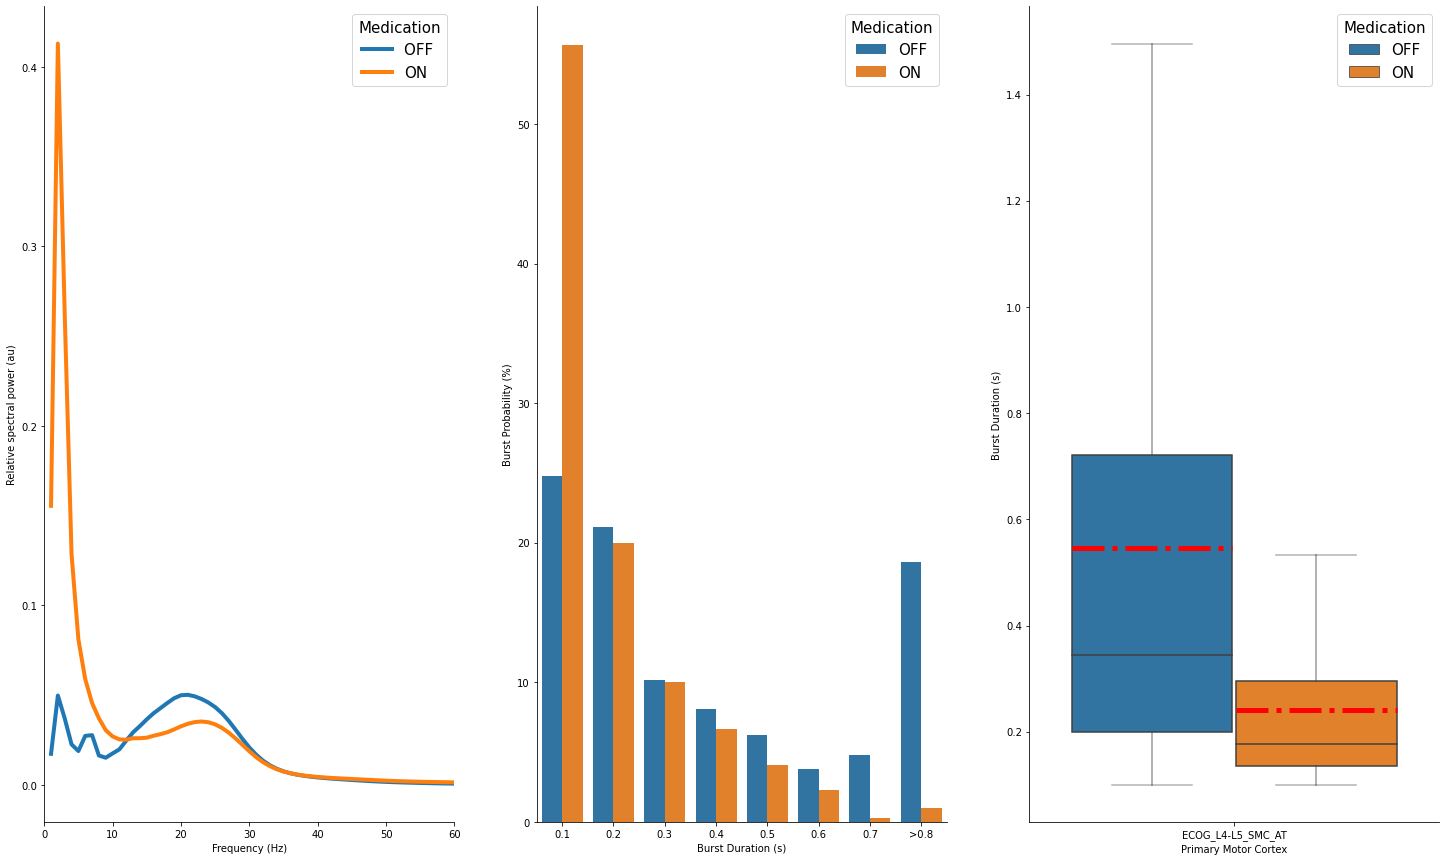

In [60]:
fig,ax = plt.subplots(1,3, figsize=(25,15),)
plt.subplot(131)
plt.plot(freqs,npow_3,label= 'OFF ',linewidth=4)
plt.plot(freqs,npow_3_on,label= 'ON',linewidth=4)
plt.xlim(0,60)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Relative spectral power (au)')
plt.legend(title='Medication', fontsize=15,title_fontsize=15)
        
plt.subplot(132)           
alpha_box=0.3
sns.barplot(data=cdf_probdur_4, x='Burst Duration (s)', y='Burst Probability (%)', hue='Medication') 
plt.legend(title='Medication', fontsize=15,title_fontsize=15)


plt.subplot(133)
alpha_box = 0.4
g = sns.boxplot(x='Location', y='Burst Duration (s)', hue='Medication',data=cdf4,         
           showfliers=False,meanline=dict(color='r'), showmeans=True,
           whiskerprops={'linewidth':2, "zorder":10, "alpha":alpha_box},
           capprops={"alpha":alpha_box},
           meanprops=dict(linestyle='-.', linewidth=5,color='r'))
plt.xlabel('Primary Motor Cortex')
plt.legend(title='Medication', fontsize=15,title_fontsize=15,loc='upper right')

#for n, ax in enumerate(ax):
 #    ax.text(-0.1, 1.1, string.ascii_uppercase[n], transform=ax.transAxes, 
  #         size=30, weight='bold')
    
sns.despine()